This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

1. CUST_ID : Identification of Credit Card holder (Categorical)

2. BALANCE : Balance amount left in their account to make purchases (

3. BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

4. PURCHASES : Amount of purchases made from account

5. ONEOFF_PURCHASES : Maximum purchase amount done in one-go

6. INSTALLMENTS_PURCHASES : Amount of purchase done in installment

7. CASH_ADVANCE : Cash in advance given by the user

8. PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

9. ONEOFF_PURCHASES_FREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

10. PURCHASES_INSTALLMENTS_FREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

11. CASH_ADVANCE_FREQUENCY : How frequently the cash in advance being paid

12. CASH_ADVANCE_TRX : Number of Transactions made with "Cash in Advanced"

13. PURCHASES_TRX : Numbe of purchase transactions made

14. CREDIT_LIMIT : Limit of Credit Card for user

15. PAYMENTS : Amount of Payment done by user

16. MINIMUM_PAYMENTS : Minimum amount of payments made by user

17. PRC_FULL_PAYMENT : Percent of full payment paid by user

18. TENURE : Tenure of credit card service for user

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings(action='ignore')

np.random.seed(42)
print('Libraries have been imported')

Libraries have been imported


# Step-1: Gathering Data

In [3]:
data=pd.read_csv('data\Dataset.csv')
df=data.copy()
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Checking the number of  rows and columns
print('Shape of data: {}'.format(df.shape))
print('Number of rows: {}'.format(df.shape[0]))
print('Number of columns: {}'.format(df.shape[1]))

Shape of data: (8950, 18)
Number of rows: 8950
Number of columns: 18


# Step-2: Data preprocessing

In [5]:
# Checking the number of  null values
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [6]:
# Counting the number of distinct elements.
df.nunique().sort_values(ascending=False)

CUST_ID                             8950
BALANCE                             8871
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PURCHASES                           6203
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
ONEOFF_PURCHASES                    4014
CREDIT_LIMIT                         205
PURCHASES_TRX                        173
CASH_ADVANCE_TRX                      65
CASH_ADVANCE_FREQUENCY                54
PRC_FULL_PAYMENT                      47
PURCHASES_INSTALLMENTS_FREQUENCY      47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_FREQUENCY                   47
BALANCE_FREQUENCY                     43
TENURE                                 7
dtype: int64

In [7]:
# printing information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
# Removing duplicate rows return the DataFrame.
df.drop_duplicates(inplace=True)

    |  Droped unnecessary columns

In [9]:
# Unnecessary columns are omitted.
df.drop(columns=['CUST_ID'], inplace=True)

In [10]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

<Figure size 2880x2880 with 0 Axes>

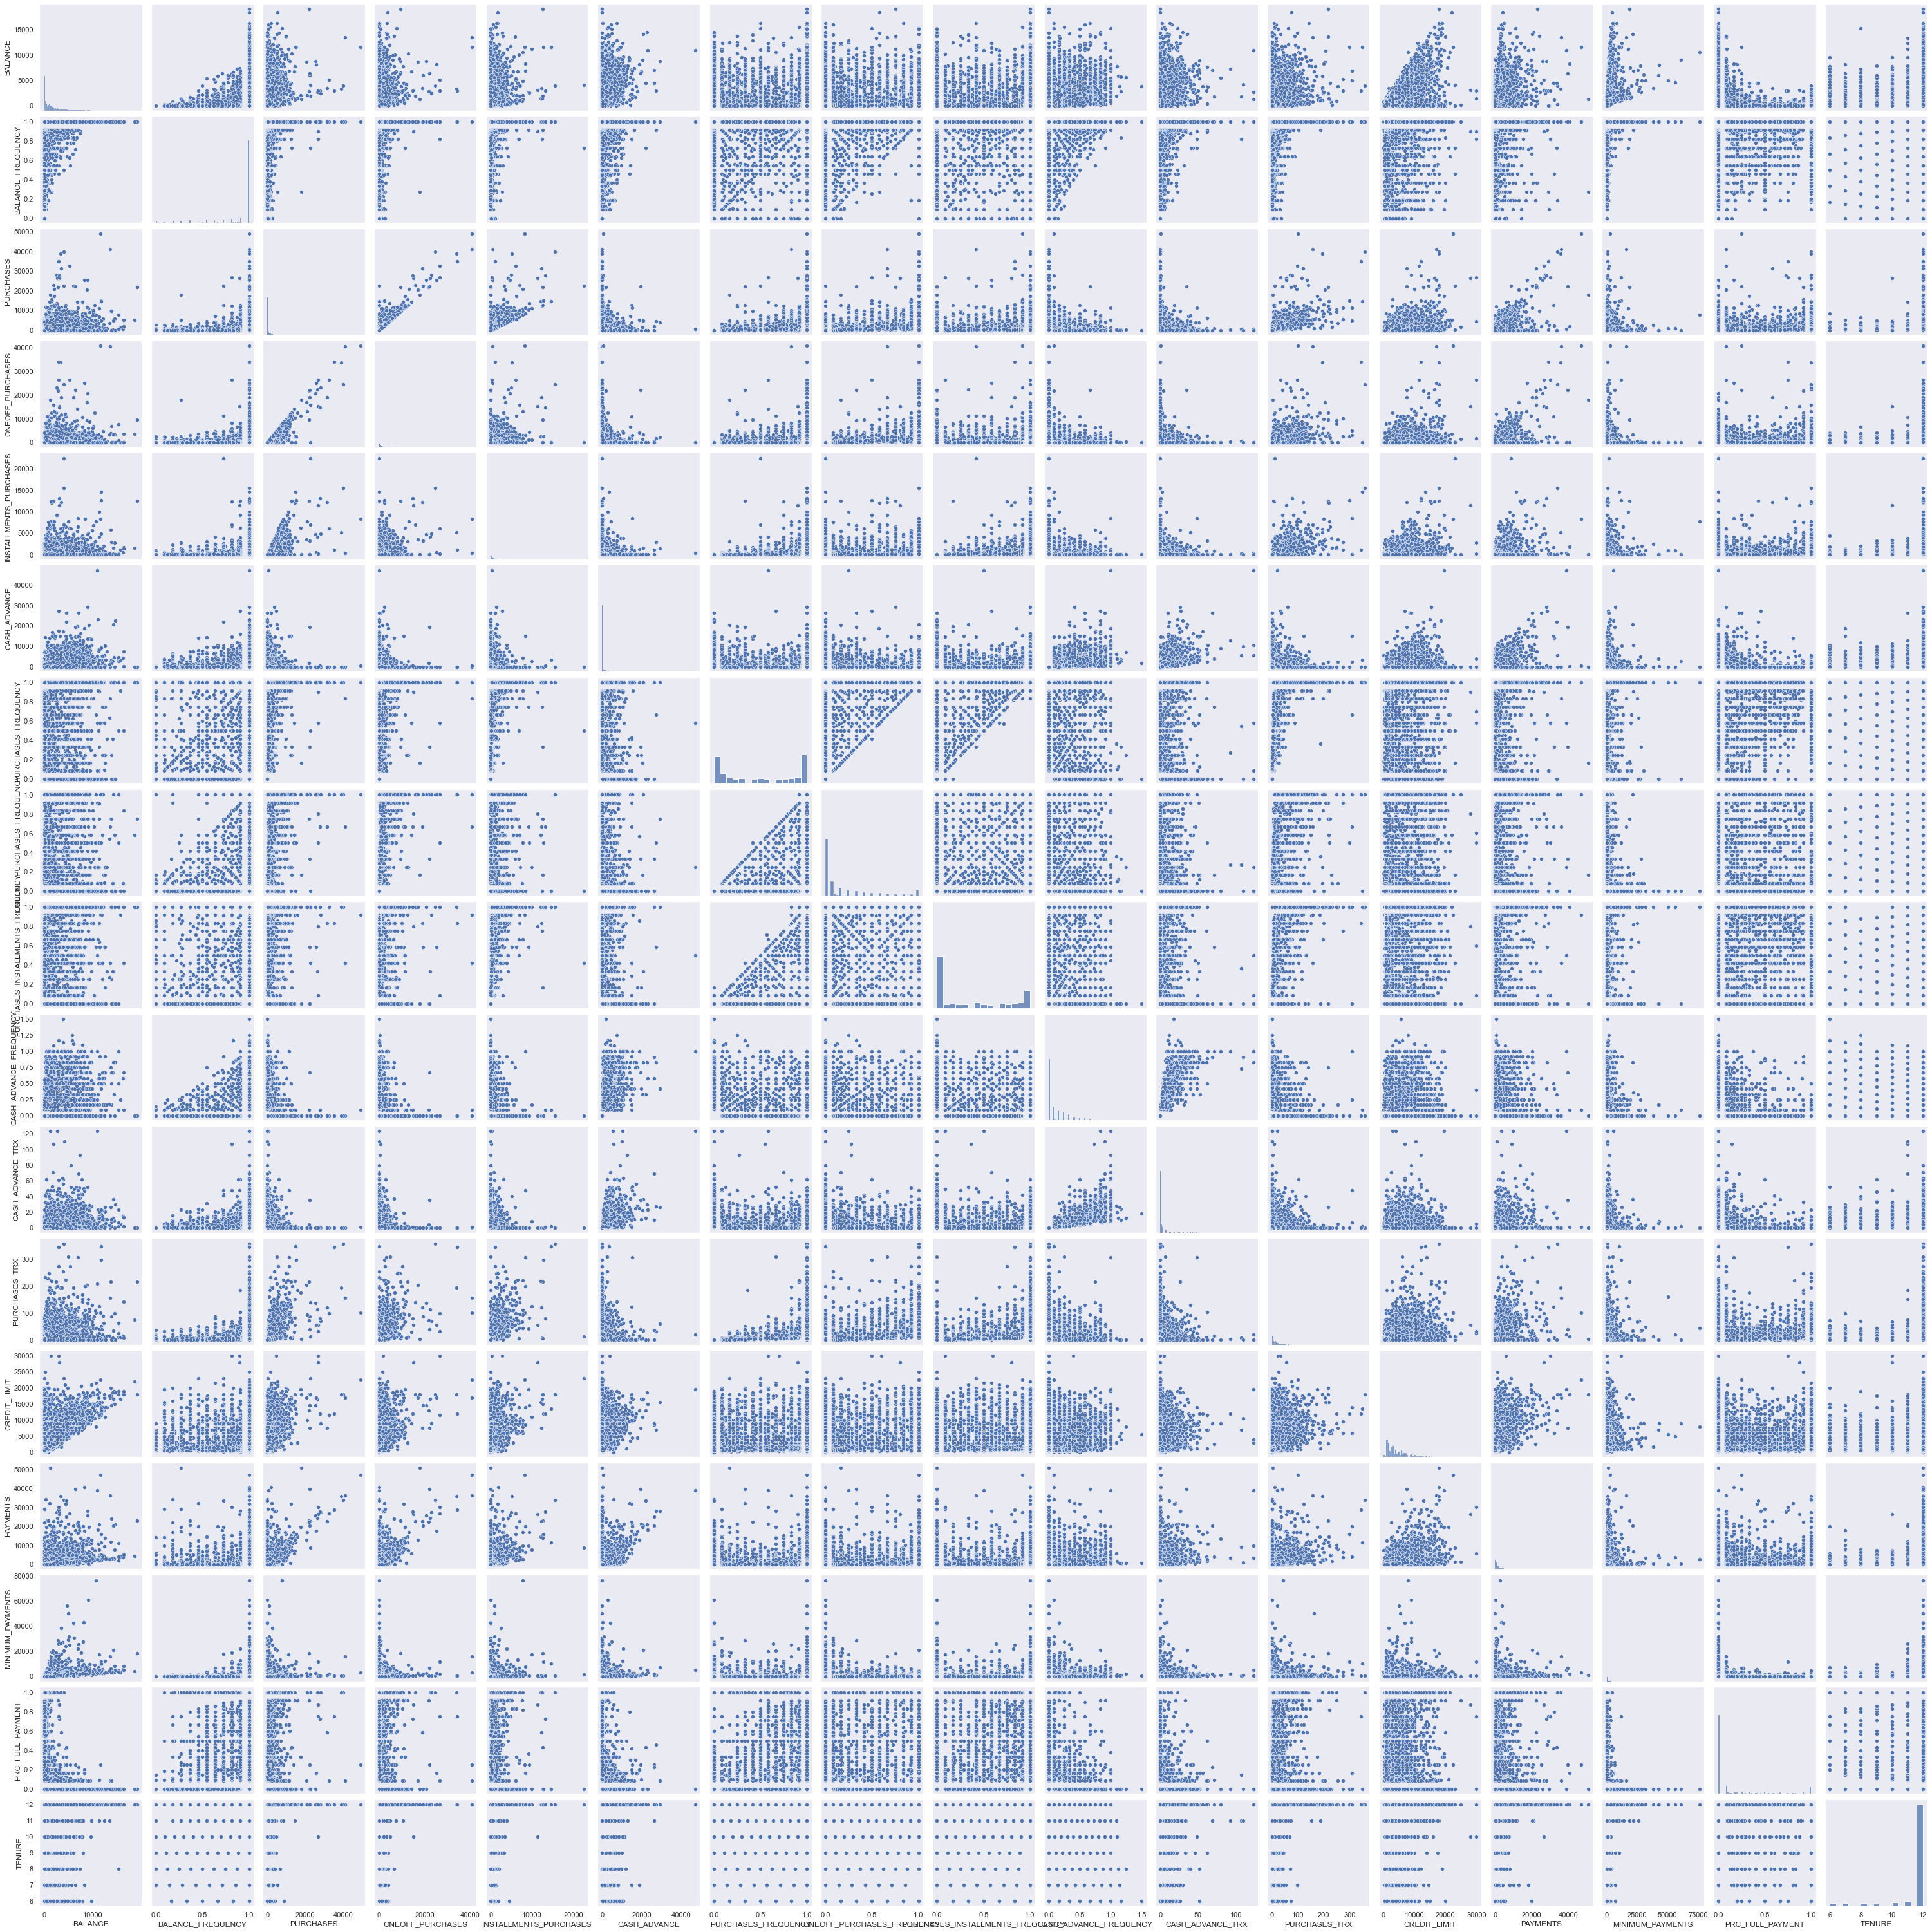

In [11]:
# Plotting pairwise relationships in dataset
plt.figure(figsize=(40, 40))
sns.set(style='dark')
sns.pairplot(df)
plt.grid()
plt.show()

<AxesSubplot:xlabel='BALANCE', ylabel='CASH_ADVANCE'>

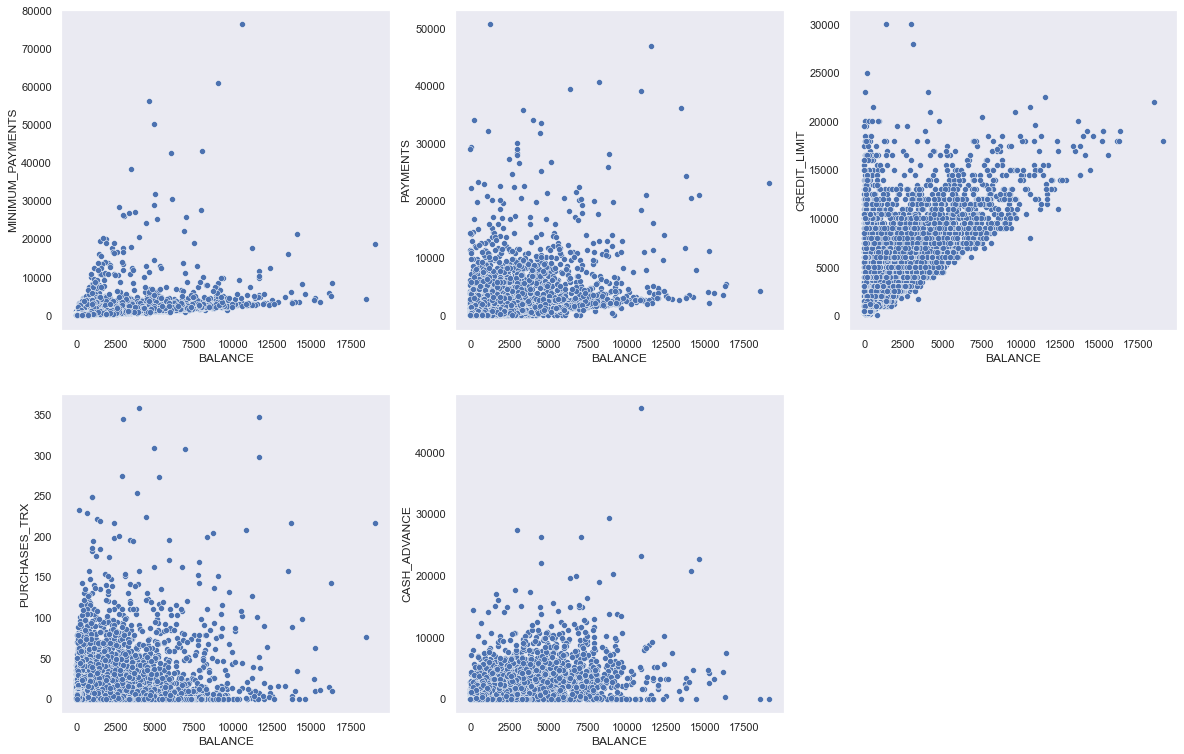

In [15]:
plt.figure(figsize=(20, 20))

plt.subplot(3,3,1)
sns.scatterplot(df['BALANCE'],df['MINIMUM_PAYMENTS'])

plt.subplot(3,3,2)
sns.scatterplot(df['BALANCE'],df['PAYMENTS'])

plt.subplot(3,3,3)
sns.scatterplot(df['BALANCE'],df['CREDIT_LIMIT'])

plt.subplot(3,3,4)
sns.scatterplot(df['BALANCE'],df['PURCHASES_TRX'])

plt.subplot(3,3,5)
sns.scatterplot(df['BALANCE'],df['CASH_ADVANCE'])


In [13]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

1. CUST_ID : Identification of Credit Card holder (Categorical)

2. BALANCE : Balance amount left in their account to make purchases (

3. BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

4. PURCHASES : Amount of purchases made from account

5. ONEOFF_PURCHASES : Maximum purchase amount done in one-go

6. INSTALLMENTS_PURCHASES : Amount of purchase done in installment

7. CASH_ADVANCE : Cash in advance given by the user

8. PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

9. ONEOFF_PURCHASES_FREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

10. PURCHASES_INSTALLMENTS_FREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

11. CASH_ADVANCE_FREQUENCY : How frequently the cash in advance being paid

12. CASH_ADVANCE_TRX : Number of Transactions made with "Cash in Advanced"

13. PURCHASES_TRX : Numbe of purchase transactions made

14. CREDIT_LIMIT : Limit of Credit Card for user

15. PAYMENTS : Amount of Payment done by user

16. MINIMUM_PAYMENTS : Minimum amount of payments made by user

17. PRC_FULL_PAYMENT : Percent of full payment paid by user

18. TENURE : Tenure of credit card service for user